<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/classic-datasets/Breast_Cancer.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# Breast Cancer Dataset

| Learning type | Activity type | Objective |
| - | - | - |
| Supervised | Binary classification | Predict if a tumor is benign or malignant |


## About the dataset

The [Breast Cancer][1] dataset is used for multivariate binary classification. There are 569 total samples with 30 features each. Features were computed from a digitized image of a fine needle aspirate of a breast mass. They describe characteristics of the cell nuclei present in the image.

![](images/breast-cancer-logo.jpg)

[1]: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

## Package setup

In [1]:
#DO THE NECESSARY IMPORTS
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score
from sklearn.datasets import load_breast_cancer

# Display plots inline, change default figure size and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

## Step 1: Loading the data
**EXERCISE: In a similar was as you did with iris and wine ;).**

In [4]:
dataset = load_breast_cancer()

In [5]:
# Put data in a pandas DataFrame
df_bc = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df_bc.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Add target and class to DataFrame
df_bc['target'] = dataset.target
df_bc['class'] = dataset.target_names[dataset.target]
df_bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [7]:
# Show 10 random samples
df_bc.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
153,11.150,13.08,70.87,381.9,0.09754,0.05113,0.01982,0.017860,0.1830,0.06105,...,76.25,440.8,0.1341,0.08971,0.07116,0.05506,0.2859,0.06772,1,benign
316,12.180,14.08,77.25,461.4,0.07734,0.03212,0.01123,0.005051,0.1673,0.05649,...,81.60,513.1,0.1001,0.05332,0.04116,0.01852,0.2293,0.06037,1,benign
398,11.060,14.83,70.31,378.2,0.07741,0.04768,0.02712,0.007246,0.1535,0.06214,...,80.79,496.7,0.1120,0.18790,0.20790,0.05556,0.2590,0.09158,1,benign
555,10.290,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.027380,0.1593,0.06127,...,69.57,357.6,0.1384,0.17100,0.20000,0.09127,0.2226,0.08283,1,benign
205,15.120,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.040790,0.1594,0.05986,...,117.70,989.5,0.1491,0.33310,0.33270,0.12520,0.3415,0.09740,0,malignant
367,12.210,18.02,78.31,458.4,0.09231,0.07175,0.04392,0.020270,0.1695,0.05916,...,93.85,624.6,0.1368,0.21700,0.24130,0.08829,0.3218,0.07470,1,benign
202,23.290,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.162000,0.2200,0.06229,...,177.00,1986.0,0.1536,0.41670,0.78920,0.27330,0.3198,0.08762,0,malignant
320,10.250,16.18,66.52,324.2,0.10610,0.11110,0.06726,0.039650,0.1743,0.07279,...,71.53,390.4,0.1402,0.23600,0.18980,0.09744,0.2608,0.09702,1,benign
447,14.800,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.022600,0.1893,0.05886,...,105.90,829.5,0.1226,0.18810,0.20600,0.08308,0.3600,0.07285,1,benign
412,9.397,21.68,59.75,268.8,0.07969,0.06053,0.03735,0.005128,0.1274,0.06724,...,66.61,301.0,0.1086,0.18870,0.18680,0.02564,0.2376,0.09206,1,benign


Since the original labels are in 0,1 format, we could change the labels to benign and malignant using .replace function. Using inplace=True will modify the dataframe breast_dataset.
**Optional**

In [12]:
# df_bc['target'].replace(0, 'Malignant',inplace=True)
# df_bc['target'].replace(1, 'Benign',inplace=True)
# # if we do this we should also drop the class
# df=df.drop("class")
# df_bc.head()

## Visualizing the Breast Cancer data

### Select your X and y's

In [6]:
# YOUR CODE HERE
# sns.set(style="ticks")
# sns.pairplot(data = df_bc.loc[:,:"target"], hue = 'target')

### Step 2: Normalize the data in X

In [15]:
X = df_bc.iloc[:, 0:30]
scaler = StandardScaler()
# transform data
X_scaled = scaler.fit_transform(X)


In [16]:
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### Optional

Convert this to a pandas dataframe again in order to visualize it. 

In [23]:
df_pandas = pd.DataFrame(X_scaled)
df_pandas.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Short exercise
Let's check whether the normalized data has a mean of zero and a standard deviation of one. **Those are indicators of proper normalization**

In [22]:
np.mean(X),np.std(X)

(mean radius                 14.127292
 mean texture                19.289649
 mean perimeter              91.969033
 mean area                  654.889104
 mean smoothness              0.096360
 mean compactness             0.104341
 mean concavity               0.088799
 mean concave points          0.048919
 mean symmetry                0.181162
 mean fractal dimension       0.062798
 radius error                 0.405172
 texture error                1.216853
 perimeter error              2.866059
 area error                  40.337079
 smoothness error             0.007041
 compactness error            0.025478
 concavity error              0.031894
 concave points error         0.011796
 symmetry error               0.020542
 fractal dimension error      0.003795
 worst radius                16.269190
 worst texture               25.677223
 worst perimeter            107.261213
 worst area                 880.583128
 worst smoothness             0.132369
 worst compactness       

## Apply the PCA Method

In [24]:
#do the necessary imports
from sklearn.decomposition import PCA

In [25]:
pca_bc = PCA(n_components=2)
principalComponents_breast = pca_bc.fit_transform(X)

Next, let's create a **new DataFrame** that will have the principal component values for all the samples.

In [32]:
df_principal_breast = pd.DataFrame(data = principalComponents_breast
             , columns = ['Principal component 1', 'Principal component 2'])
df_principal_breast.tail()

,Principal component 1,Principal component 2
564,1414.126684,110.222492
565,1045.018854,77.057589
566,314.501756,47.553525
567,1124.858115,34.129225
568,-771.527622,-88.643106


Once you have the principal components, you can find the **explained_variance_ratio**. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [28]:
print('Explained variation per principal component: {}'.format(pca_bc.explained_variance_ratio_))

Explained variation per principal component: [0.98204467 0.01617649]


From the above output, you can observe that the principal component 1 holds **44.2%** of the information while the principal component 2 holds only **19%** of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost.

## Plotting the visualization

<Figure size 432x288 with 0 Axes>

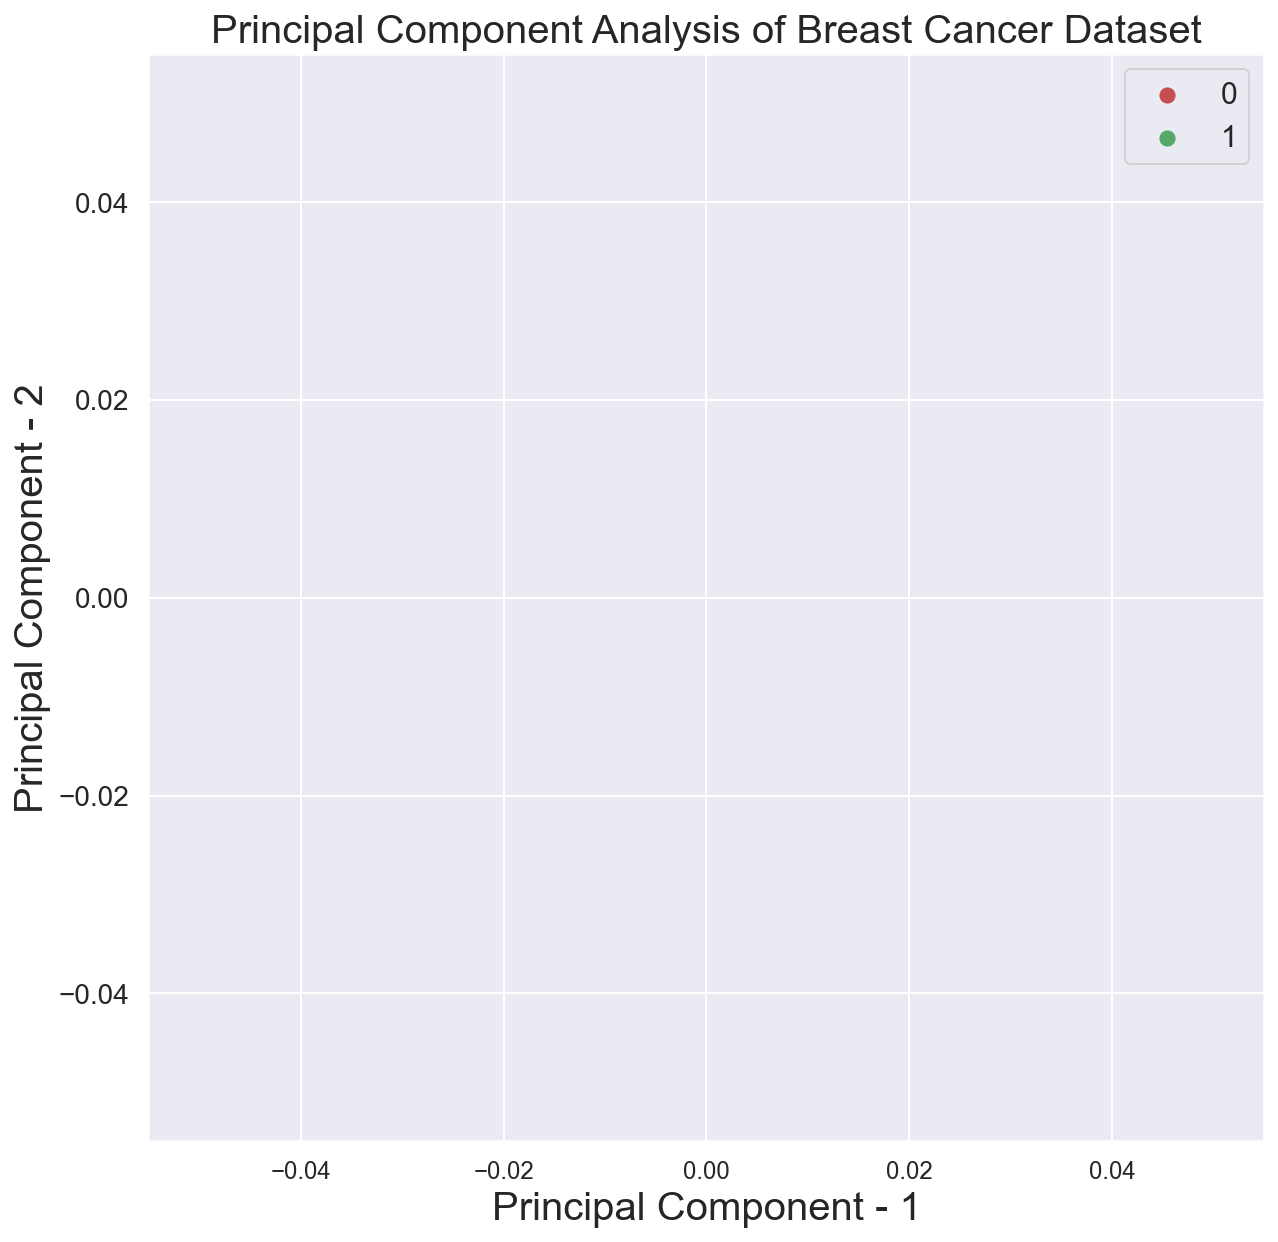

In [34]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_bc['target'] == target
    plt.scatter(df_principal_breast.loc[indicesToKeep, 'Principal component 1']
               , df_principal_breast.loc[indicesToKeep, 'Principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

### Additional Challenge: Can you fix the labels in the plot so they are the original classes? 
Benign and Malign instead of 1 and 0